In [65]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import seaborn as sns
from numpy import exp

import statistics as stats

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import pairwise
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression, LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

from imblearn.over_sampling import RandomOverSampler

import dmba
from dmba import regressionSummary, plotDecisionTree, classificationSummary, gainsChart, liftChart

%matplotlib inline

In [66]:
# absent = pd.read_csv('/Users/mtc/ADS/ADS 505/Project/Absenteeism_at_work.csv', delimiter = ";")
absent = pd.read_csv('/Users/patriciomartinez/Downloads/absenteeism+at+work/Absenteeism_at_work.csv', delimiter=';')

In [67]:
absent.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


In [68]:
absent.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [69]:
count = pd.DataFrame(absent['ID'].value_counts())

count = count.sort_values('ID')

print(count) #IDs 8, 4, and 35 have no hours of absence, but this will be taken care of later, since measures will be in hours/unit of time

    count
ID       
1      23
2       6
3     113
4       1
5      19
6       8
7       6
8       2
9       8
10     24
11     40
12      7
13     15
14     29
15     37
16      2
17     20
18     16
19      3
20     42
21      3
22     46
23      8
24     30
25     10
26      5
27      7
28     76
29      5
30      7
31      3
32      5
33     24
34     55
35      1
36     34


In [70]:
count_reason = pd.DataFrame(absent['Reason for absence'].value_counts())

count_reason = count_reason.sort_values('count', ascending=True)

print(count_reason)

                    count
Reason for absence       
17                      1
3                       1
2                       1
4                       2
15                      2
24                      3
16                      3
5                       3
9                       4
8                       6
21                      6
12                      8
6                       8
7                      15
1                      16
14                     19
18                     21
10                     25
11                     26
25                     31
26                     33
22                     38
19                     40
0                      43
13                     55
27                     69
28                    112
23                    149


In [71]:
indv_info = pd.DataFrame(absent.groupby(['ID'])['Absenteeism time in hours'].sum())

indv_info['abs_hr_per_month'] = indv_info['Absenteeism time in hours']/36

indv_info['abs_hr_per_log'] = indv_info['Absenteeism time in hours']/count['count']


### EDA Plots

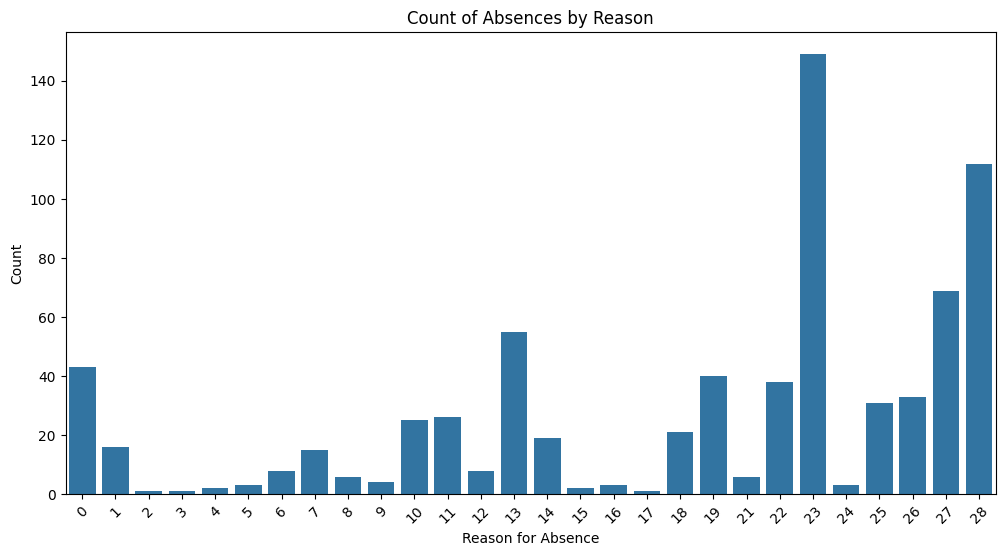

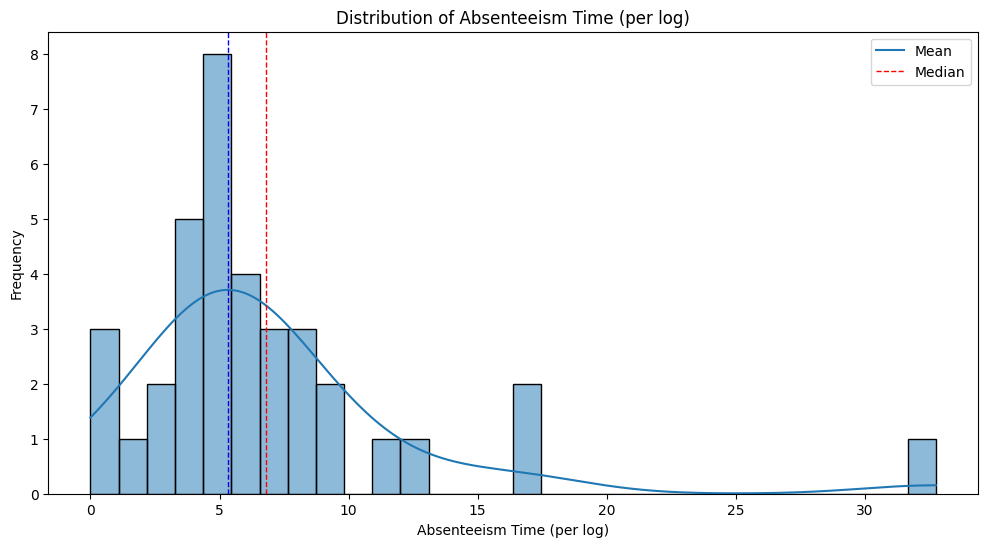

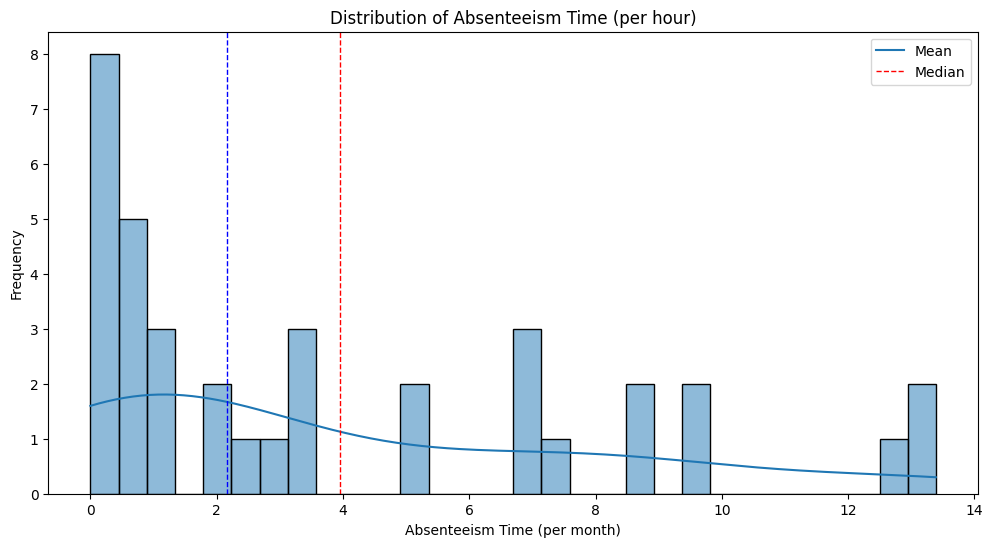

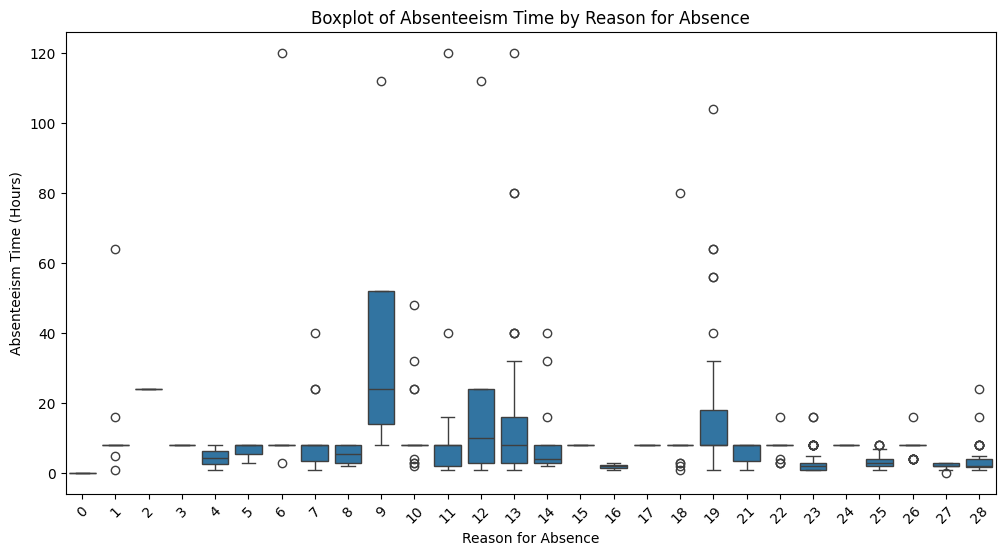

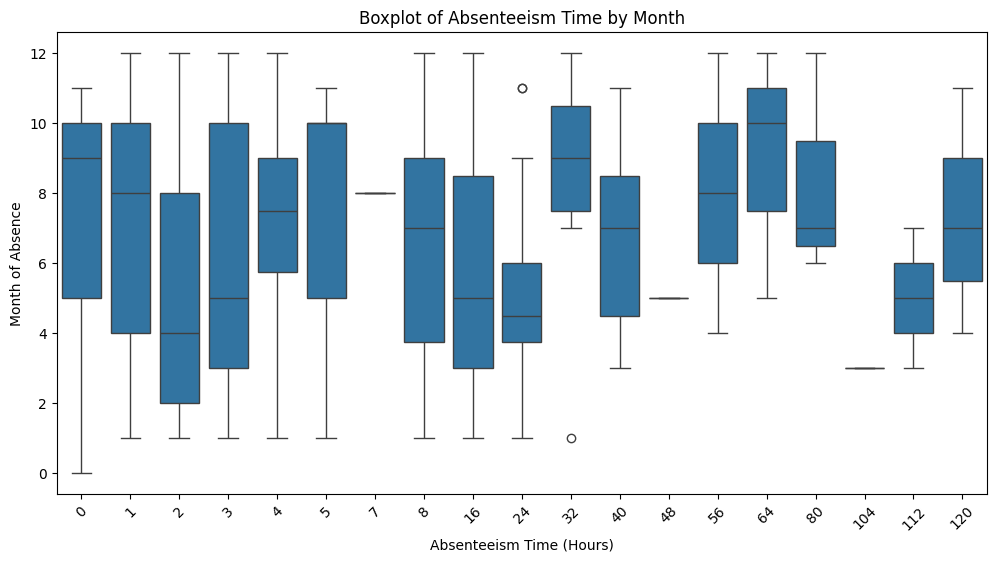

In [72]:
plt.figure(figsize=(12, 6))
sns.countplot(data=absent, x='Reason for absence')
plt.title('Count of Absences by Reason')
plt.xlabel('Reason for Absence')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(indv_info['abs_hr_per_log'], bins=30, kde=True)
plt.title('Distribution of Absenteeism Time (per log)')
plt.xlabel('Absenteeism Time (per log)')
plt.ylabel('Frequency')
plt.axvline(indv_info['abs_hr_per_log'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.axvline(indv_info['abs_hr_per_log'].median(), color='blue', linestyle='dashed', linewidth=1)
plt.legend({'Mean': indv_info['abs_hr_per_log'].mean(), 'Median': indv_info['abs_hr_per_log'].median()})
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(indv_info['abs_hr_per_month'], bins=30, kde=True)
plt.title('Distribution of Absenteeism Time (per hour)')
plt.xlabel('Absenteeism Time (per month)')
plt.ylabel('Frequency')
plt.axvline(indv_info['abs_hr_per_month'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.axvline(indv_info['abs_hr_per_month'].median(), color='blue', linestyle='dashed', linewidth=1)
plt.legend({'Mean': indv_info['abs_hr_per_month'].mean(), 'Median': indv_info['abs_hr_per_month'].median()})
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(absent, x='Reason for absence', y='Absenteeism time in hours')
plt.title('Boxplot of Absenteeism Time by Reason for Absence')
plt.xlabel('Reason for Absence')
plt.ylabel('Absenteeism Time (Hours)')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(absent, x='Absenteeism time in hours', y='Month of absence')
plt.title('Boxplot of Absenteeism Time by Month')
plt.xlabel('Absenteeism Time (Hours)')
plt.ylabel('Month of Absence')
plt.xticks(rotation=45)
plt.show()

In [73]:
print(indv_info.sort_values('Absenteeism time in hours', ascending=False))

    Absenteeism time in hours  abs_hr_per_month  abs_hr_per_log
ID                                                             
3                         482         13.388889        4.265487
14                        476         13.222222       16.413793
11                        450         12.500000       11.250000
28                        347          9.638889        4.565789
34                        344          9.555556        6.254545
36                        311          8.638889        9.147059
20                        306          8.500000        7.285714
9                         262          7.277778       32.750000
24                        254          7.055556        8.466667
15                        253          7.027778        6.837838
22                        253          7.027778        5.500000
10                        186          5.166667        7.750000
13                        183          5.083333       12.200000
17                        126          3

In [74]:
print(indv_info.sort_values('abs_hr_per_month', ascending=False))


    Absenteeism time in hours  abs_hr_per_month  abs_hr_per_log
ID                                                             
3                         482         13.388889        4.265487
14                        476         13.222222       16.413793
11                        450         12.500000       11.250000
28                        347          9.638889        4.565789
34                        344          9.555556        6.254545
36                        311          8.638889        9.147059
20                        306          8.500000        7.285714
9                         262          7.277778       32.750000
24                        254          7.055556        8.466667
15                        253          7.027778        6.837838
22                        253          7.027778        5.500000
10                        186          5.166667        7.750000
13                        183          5.083333       12.200000
17                        126          3

In [75]:
print(pd.DataFrame(absent[(absent['ID'] == 9)].value_counts('Reason for absence')))

                    count
Reason for absence       
6                       2
18                      2
25                      2
1                       1
12                      1


In [76]:
print(pd.DataFrame(absent[(absent['ID'] == 3)].value_counts('Reason for absence')))

                    count
Reason for absence       
27                     38
28                     26
23                     19
13                     10
11                      7
10                      2
18                      2
21                      2
25                      2
0                       1
5                       1
6                       1
12                      1
26                      1


In [77]:
print(pd.DataFrame(indv_info[(indv_info['Absenteeism time in hours'] < 20)]))

    Absenteeism time in hours  abs_hr_per_month  abs_hr_per_log
ID                                                             
4                           0          0.000000        0.000000
8                           0          0.000000        0.000000
16                         16          0.444444        8.000000
19                          6          0.166667        2.000000
21                         16          0.444444        5.333333
31                         16          0.444444        5.333333
32                         16          0.444444        3.200000
35                          0          0.000000        0.000000


## Data Processing

In [78]:
absent.columns = ['worker_id', 'absence_reason', 'absence_month', 'absence_day', 'season', 'trans_exp', 'distance_to_work', 'serve_time', 'Age', 'avg_work_per_day', 'target_hit', 'disc_fail', 'educ', 'children', 'soc_drink', 'soc_smoke', 'pets', 'weight', 'height', 'BMI', 'absence_hours']

absent.dtypes

worker_id             int64
absence_reason        int64
absence_month         int64
absence_day           int64
season                int64
trans_exp             int64
distance_to_work      int64
serve_time            int64
Age                   int64
avg_work_per_day    float64
target_hit            int64
disc_fail             int64
educ                  int64
children              int64
soc_drink             int64
soc_smoke             int64
pets                  int64
weight                int64
height                int64
BMI                   int64
absence_hours         int64
dtype: object

In [79]:
print(stats.median(absent['absence_hours']))
print(stats.stdev(absent['absence_hours']))
print(stats.median(absent['absence_hours']) + 2*stats.stdev(absent['absence_hours']))

3.0
13.330998100978201
29.661996201956402


In [80]:
cutoff = stats.median(absent['absence_hours']) + 2*stats.stdev(absent['absence_hours'])
absent['above_normal'] = absent['absence_hours'] > cutoff

In [81]:
absent['absence_month'] = absent['absence_month'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
absent['absence_day'] = absent['absence_day'].replace([1, 2, 3, 4, 5, 6, 7], ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
absent['season'] = absent['season'].replace([1, 2, 3, 4], ['summer', 'autumn', 'winter', 'spring'])
absent['disc_fail'] = absent['disc_fail'].replace([0,1], ['no', 'yes'])
absent['soc_drink'] = absent['soc_drink'].replace([0,1], ['no', 'yes'])
absent['soc_smoke'] = absent['soc_smoke'].replace([0,1], ['no', 'yes'])

absent['absence_reason'] = absent['absence_reason'].astype('object')

In [82]:
X= absent.drop(columns = ['absence_hours', 'worker_id', 'absence_hours', 'above_normal', 'BMI'], axis = 1)
y = absent['above_normal']

In [83]:
dum_col = ['absence_reason', 'absence_month', 'absence_day', 'season', 'disc_fail', 'soc_drink', 'soc_smoke']
X_dum = pd.get_dummies(X[dum_col], drop_first=True)
X_dum.head()

,absence_reason_1,absence_reason_2,absence_reason_3,absence_reason_4,absence_reason_5,absence_reason_6,absence_reason_7,absence_reason_8,absence_reason_9,absence_reason_10,...,absence_day_Mon,absence_day_Thu,absence_day_Tue,absence_day_Wed,season_spring,season_summer,season_winter,disc_fail_yes,soc_drink_yes,soc_smoke_yes
0,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,True,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,True,False,True,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,True,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,True,False,False,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,True,False,False,True,False


In [84]:
scaler = preprocessing.StandardScaler()
X_norm = X.drop(columns = dum_col)
X_norm = pd.DataFrame(scaler.fit_transform(X_norm*1.0), columns=X_norm.columns)

In [85]:
X_new = pd.concat([X_dum, X_norm], axis = 1)

ros = RandomOverSampler(random_state=1)
X_res, y_res = ros.fit_resample(X_new, y)

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.4, random_state=12345)

In [87]:
predictors = X_train.columns
X_train

,absence_reason_1,absence_reason_2,absence_reason_3,absence_reason_4,absence_reason_5,absence_reason_6,absence_reason_7,absence_reason_8,absence_reason_9,absence_reason_10,...,distance_to_work,serve_time,Age,avg_work_per_day,target_hit,educ,children,pets,weight,height
792,False,False,False,False,False,False,False,False,False,False,...,-1.324030,-0.582863,0.084950,-0.260922,0.638686,-0.433857,-0.928191,-0.56624,0.307963,-0.019046
1067,False,False,False,False,False,False,False,False,False,False,...,-1.324030,-0.582863,0.084950,1.500594,1.433018,-0.433857,-0.928191,-0.56624,0.307963,-0.019046
652,False,False,False,False,False,False,False,False,False,False,...,0.429556,0.101770,-0.532868,-1.262928,1.168240,-0.433857,0.893723,0.19285,0.851673,-0.019046
1286,False,False,False,False,False,False,False,False,False,False,...,-1.324030,-0.582863,0.084950,-0.260922,0.638686,-0.433857,-0.928191,-0.56624,0.307963,-0.019046
803,False,False,False,False,False,False,False,False,False,False,...,1.441240,1.242825,0.239405,0.232087,0.903463,-0.433857,-0.928191,-0.56624,0.774000,-0.350671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1381,False,False,False,False,False,False,False,False,False,True,...,-1.189139,0.329981,-0.378414,0.892986,-0.420423,-0.433857,0.893723,-0.56624,1.240037,3.960449
382,False,False,False,False,False,False,False,False,False,False,...,-0.312346,0.786403,0.702769,-0.504006,0.373908,-0.433857,-0.928191,-0.56624,-0.934804,-0.350671
129,False,False,False,False,False,False,False,False,False,False,...,-0.244901,-0.811074,-0.996232,0.950580,0.109131,2.538869,-0.928191,-0.56624,-1.789206,-0.184858
1309,False,False,False,False,False,False,False,False,False,False,...,-1.054248,0.786403,3.328497,-1.262928,1.168240,-0.433857,0.893723,0.19285,-1.090150,-0.019046


## Logistic Regression

In [88]:
pd.set_option('display.max_rows', 62)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

predictors = X_train.columns
coef = log_reg.coef_.reshape(60,)

coef = pd.DataFrame({'Predictor': predictors, 'coefficient': coef})
coef['exp'] = exp(coef['coefficient'])
display(coef.sort_values(by = ['exp'], ascending=False))

log_pred = log_reg.predict(X_test)

print(f'accuracy: {accuracy_score(y_test, log_pred)}')
print(f'precision: {precision_score(y_test, log_pred, zero_division=0)}')
print(f'recall: {recall_score(y_test, log_pred, zero_division=1)}')
print('\n')

classificationSummary(y_test, log_pred)

,Predictor,coefficient,exp
8,absence_reason_9,3.636973,37.976703
18,absence_reason_19,3.026941,20.634012
12,absence_reason_13,2.765652,15.889396
0,absence_reason_1,1.707887,5.517293
39,absence_day_Mon,1.663006,5.275145
13,absence_reason_14,1.260573,3.527442
43,season_spring,1.237544,3.447137
29,absence_month_Dec,1.083613,2.955338
32,absence_month_Jul,1.080696,2.946731
10,absence_reason_11,0.989546,2.690014


accuracy: 0.9438596491228071
precision: 0.8990536277602523
recall: 1.0


Confusion Matrix (Accuracy 0.9439)

       Prediction
Actual   0   1
     0 253  32
     1   0 285


## Random Forest (with hyperparameter tuning)

In [89]:
grid_space = {'max_depth': [5, 10, 15],
              'n_estimators': [5, 10, 15, 20, 25, 30]}

rf = RandomForestClassifier(random_state=12345)

grid = GridSearchCV(rf, param_grid = grid_space, cv = 5, scoring = 'accuracy')
rf_fit = grid.fit(X_train, y_train)

print('Best hyperparameters are: '+str(rf_fit.best_params_))
print('Best score is: '+str(rf_fit.best_score_))


rf_hp = RandomForestClassifier(max_depth=15, n_estimators=10, random_state=12345)
rf_fit = rf_hp.fit(X_train, y_train)

rf_pred = rf_fit.predict(X_test)

print(f'accuracy: {accuracy_score(y_test, rf_pred)}')
print(f'precision: {precision_score(y_test, rf_pred, zero_division=0)}')
print(f'recall: {recall_score(y_test, rf_pred, zero_division=1)}')
print('\n')

print(classificationSummary(y_test, rf_pred))

importances = rf_fit.feature_importances_
feature_imp_df = pd.DataFrame({'Feature': predictors, 'Gini Importance': importances}).sort_values('Gini Importance', ascending=False) 
display(feature_imp_df)


Best hyperparameters are: {'max_depth': 15, 'n_estimators': 10}
Best score is: 0.9859442724458203
accuracy: 0.9929824561403509
precision: 0.986159169550173
recall: 1.0


Confusion Matrix (Accuracy 0.9930)

       Prediction
Actual   0   1
     0 281   4
     1   0 285
None


,Feature,Gini Importance
21,absence_reason_23,0.066914
53,avg_work_per_day,0.065565
50,distance_to_work,0.064968
49,trans_exp,0.058090
40,absence_day_Thu,0.051818
59,height,0.049804
18,absence_reason_19,0.047863
54,target_hit,0.042761
12,absence_reason_13,0.041536
39,absence_day_Mon,0.040088


## K-Means Clustering

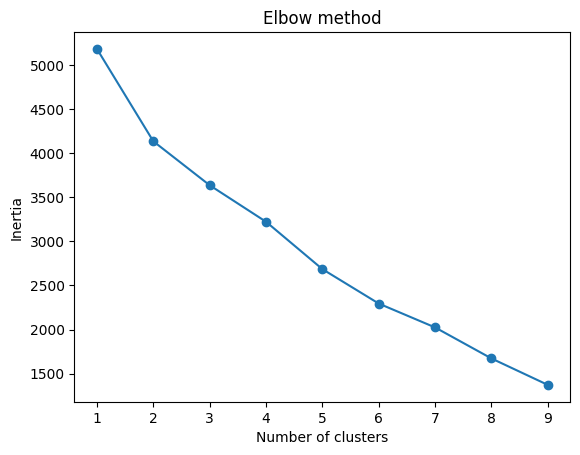

,distance_to_work,trans_exp,height,children,Age,weight,pets
0,0.139375,0.715329,-0.443687,1.142570,0.385571,-0.286519,-0.018214
1,0.194428,0.215383,-0.298453,-0.218551,-1.105460,-0.965272,0.951940
2,1.429338,-0.563587,-0.329770,-0.920536,0.330260,0.828175,-0.496072
3,-0.995125,-0.504510,0.783909,-0.362235,0.347852,0.574034,-0.466105


In [90]:
inertias = []

for i in range(1,10):
    kmeans = KMeans(n_clusters=i, random_state=12345)
    kmeans.fit(X_new[['distance_to_work', 'trans_exp', 'height', 'children', 'Age', 'weight', 'pets']])
    inertias.append(kmeans.inertia_)

plt.plot(range(1,10), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

kmeans = KMeans(n_clusters=4)
kmeans_absent = kmeans.fit(X_new[['distance_to_work', 'trans_exp', 'height', 'children', 'Age', 'weight', 'pets']])

pd.DataFrame(kmeans_absent.cluster_centers_, columns = ['distance_to_work', 'trans_exp', 'height', 'children', 'Age', 'weight', 'pets'])

### Lasso Regression

In [91]:
from sklearn.metrics import classification_report

# Lasso (L1) Logistic Regression
lasso_params = {'C': [0.01, 0.1, 1, 10, 85, 100]} 
lasso_clf = GridSearchCV(LogisticRegression(penalty='l1', solver='liblinear'), param_grid=lasso_params, cv=5, scoring='accuracy')
lasso_clf.fit(X_train, y_train)

# Best parameters and evaluation for Lasso
print("\nBest C for Lasso (L1):", lasso_clf.best_params_['C'])
lasso_best = lasso_clf.best_estimator_
lasso_pred = lasso_best.predict(X_test)

# Evaluate Lasso (L1) Classification
print("\nLasso (L1) Logistic Regression Evaluation:")
print(f'Accuracy: {accuracy_score(y_test, lasso_pred)}')
print(f'Precision: {precision_score(y_test, lasso_pred, zero_division=0)}')
print(f'Recall: {recall_score(y_test, lasso_pred, zero_division=0)}')
print(f'F1 Score: {f1_score(y_test, lasso_pred)}')
print(classificationSummary(y_test, lasso_pred))
print("\nClassification Report for Lasso (L1):")
print(classification_report(y_test, lasso_pred))


Best C for Lasso (L1): 100

Lasso (L1) Logistic Regression Evaluation:
Accuracy: 0.9491228070175438
Precision: 0.9076433121019108
Recall: 1.0
F1 Score: 0.9515859766277128
Confusion Matrix (Accuracy 0.9491)

       Prediction
Actual   0   1
     0 256  29
     1   0 285
None

Classification Report for Lasso (L1):
              precision    recall  f1-score   support

       False       1.00      0.90      0.95       285
        True       0.91      1.00      0.95       285

    accuracy                           0.95       570
   macro avg       0.95      0.95      0.95       570
weighted avg       0.95      0.95      0.95       570



In [92]:
predictors = X_train.columns
coef = lasso_best.coef_.reshape(60,)

coef = pd.DataFrame({'Predictor': predictors, 'coefficient': coef})
coef['exp'] = exp(coef['coefficient'])
display(coef.sort_values(by = ['exp'], ascending=False))

,Predictor,coefficient,exp
8,absence_reason_9,24.511750,4.418935e+10
28,absence_month_Aug,10.662588,4.272709e+04
18,absence_reason_19,7.558744,1.917435e+03
10,absence_reason_11,7.323243,1.515110e+03
12,absence_reason_13,7.120793,1.237431e+03
13,absence_reason_14,6.951726,1.044952e+03
32,absence_month_Jul,6.798932,8.968887e+02
43,season_spring,5.771131,3.209005e+02
0,absence_reason_1,4.047485,5.725328e+01
5,absence_reason_6,3.913823,5.009008e+01


### Ridge Regression

In [93]:
# Ridge (L2) Logistic Regression
ridge_params = {'C': [0.01, 0.1, 1, 10, 100]} 
ridge_clf = GridSearchCV(LogisticRegression(penalty='l2', solver='liblinear'), param_grid=ridge_params, cv=5, scoring='accuracy')
ridge_clf.fit(X_train, y_train)

# Best parameters and evaluation for Ridge
print("\nBest C for Ridge (L2):", ridge_clf.best_params_['C'])
ridge_best = ridge_clf.best_estimator_
ridge_pred = ridge_best.predict(X_test)

# Evaluate Ridge (L2) Classification
print("\nRidge (L2) Logistic Regression Evaluation:")
print(f'Accuracy: {accuracy_score(y_test, ridge_pred)}')
print(f'Precision: {precision_score(y_test, ridge_pred, zero_division=0)}')
print(f'Recall: {recall_score(y_test, ridge_pred, zero_division=0)}')
print(f'F1 Score: {f1_score(y_test, ridge_pred)}')
print(classificationSummary(y_test, ridge_pred))
print("\nClassification Report for Ridge (L2):")
print(classification_report(y_test, ridge_pred))


Best C for Ridge (L2): 100

Ridge (L2) Logistic Regression Evaluation:
Accuracy: 0.9491228070175438
Precision: 0.9076433121019108
Recall: 1.0
F1 Score: 0.9515859766277128
Confusion Matrix (Accuracy 0.9491)

       Prediction
Actual   0   1
     0 256  29
     1   0 285
None

Classification Report for Ridge (L2):
              precision    recall  f1-score   support

       False       1.00      0.90      0.95       285
        True       0.91      1.00      0.95       285

    accuracy                           0.95       570
   macro avg       0.95      0.95      0.95       570
weighted avg       0.95      0.95      0.95       570



In [94]:
predictors = X_train.columns
coef = ridge_best.coef_.reshape(60,)

coef = pd.DataFrame({'Predictor': predictors, 'coefficient': coef})
coef['exp'] = exp(coef['coefficient'])
display(coef.sort_values(by = ['exp'], ascending=False))

,Predictor,coefficient,exp
8,absence_reason_9,16.955159,2.309576e+07
28,absence_month_Aug,7.750907,2.323680e+03
18,absence_reason_19,6.671691,7.897296e+02
12,absence_reason_13,6.316391,5.535713e+02
13,absence_reason_14,5.627996,2.781042e+02
10,absence_reason_11,5.614228,2.743014e+02
32,absence_month_Jul,4.790844,1.204029e+02
43,season_spring,3.976410,5.332525e+01
0,absence_reason_1,3.911006,4.994920e+01
38,absence_month_Sep,3.536561,3.434860e+01
